Full results saved to 'full_feelslike_predictions_2020_to_2024.csv'


C:\Users\natra\AppData\Local\Temp\ipykernel_36596\2281801688.py:47: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  full_data.fillna(method='ffill', inplace=True)


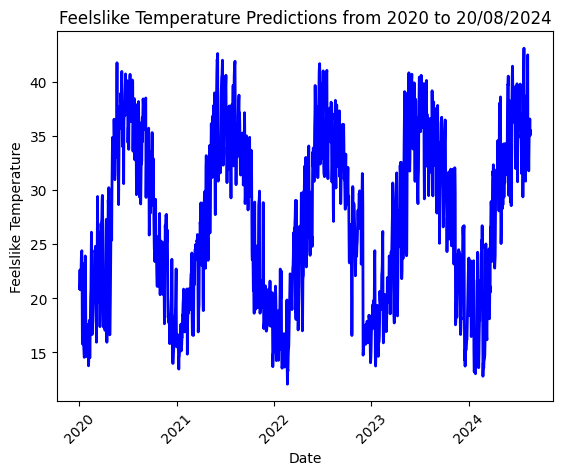

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
file_path = '../../../dataset/data.csv'  # Adjust the path to your dataset
data = pd.read_csv(file_path)

# Prepare the data for Polynomial Regression
# We will use 'tempmax', 'tempmin', 'humidity', 'dew', and 'windspeed' as features to predict 'feelslike'
X = data[['tempmax', 'tempmin', 'humidity', 'dew', 'windspeed']]
y = data['feelslike']

# Include the 'datetime' in the dataset
data['datetime'] = pd.to_datetime(data['datetime'], format='%m/%d/%Y')
dates = data['datetime']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Apply Polynomial Features (e.g., degree = 2 for quadratic terms)
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 2: Initialize and train the Linear Regression model on the polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on the test set
y_pred_test = model.predict(X_test_poly)

# Step 3: Generate a date range from 2020 to 20/08/2024 (this will ensure we have all the days)
full_date_range = pd.date_range(start='2020-01-01', end='2024-08-20')

# Step 4: Merge full date range with original dataset to include all days
full_data = pd.DataFrame({'datetime': full_date_range})

# Merge with the original data to get tempmax, tempmin, humidity, dew, windspeed for all days
full_data = pd.merge(full_data, data, on='datetime', how='left')

# Fill missing values in the feature columns with forward fill (or other appropriate method)
full_data.fillna(method='ffill', inplace=True)

# Extract the features for the full date range
X_full = full_data[['tempmax', 'tempmin', 'humidity', 'dew', 'windspeed']]

# Apply polynomial transformation on the full set of features
X_full_poly = poly.transform(X_full)

# Step 5: Predict the feelslike temperature for the full date range
feelslike_pred_full = model.predict(X_full_poly)

# Step 6: Create a DataFrame to compare actual vs predicted feelslike values for the full date range
full_results_df = pd.DataFrame({
    'Date': full_date_range,
    'Actual Feelslike': full_data['feelslike'],  # This may have some NaNs for missing days in original data
    'Predicted Feelslike': feelslike_pred_full
})

# Step 7: Save the actual vs predicted values to a CSV file
full_results_df.to_csv('full_feelslike_predictions_2020_to_2024.csv', index=False)
print("Full results saved to 'full_feelslike_predictions_2020_to_2024.csv'")

# Step 8: Plot actual vs predicted feelslike temperatures for the full date range
plt.plot(full_date_range, feelslike_pred_full, label='Predicted Feelslike', color='blue', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Feelslike Temperature')
plt.title(f'Feelslike Temperature Predictions from 2020 to 20/08/2024')
plt.xticks(rotation=45)
plt.show()
